# Import plaintext

In [1]:
from tqdm.notebook import trange
NumTraces = 500

In [2]:
import pathlib
import numpy as np
pt = []
for path in pathlib.Path("../../joules-swaes-picochip").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        for i in range (NumTraces):
            a = current_file.readline()
            pt.append(a)
        current_file.close()
#pt.sort()

In [3]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)
print(len(pt_array))
print(len(pt_array[0]))

500
16


# Import key

In [4]:
key_array = []
key = 'f0debc9a78563412efcdab8967452301'
for i in range (NumTraces):
    b = bytes.fromhex(key)
    one_array = np.frombuffer(b,dtype=np.uint8)
    key_array.append(one_array)
print(len(key_array))
print(len(key_array[0]))

500
16


# Import traces

In [5]:
import glob
import matplotlib.pylab as plt
NumofTraces = NumTraces
strx = []
stry = []
floatx = []
floaty = []
path = "../../joules-swaes-picochip/report_400samples/*.data"  #### edit here
#path = "../../Downloads/pico_coaes_512/gate/picoaes_tsmc180_200_sca_trace_0_plot.png.data"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-20:]):
    print(filename)
    with open(filename, 'r') as f:
        next(f)
        for a,line in enumerate(f):
            row = line.split()
            if row:
                strx.append(row[-2])
                stry.append(row[-1])
            if a == 399:  #### edit here, crop the extra points 
                break
                
for i in range (len(stry)):
    floatx.append(float(strx[i]))
    floaty.append(float(stry[i]))
floatx = np.hstack(floatx)
floaty = np.hstack(floaty)
trace_array_x = np.array_split(floatx, NumofTraces)
trace_array_y = np.array_split(floaty, NumofTraces)

print(len(trace_array_y))
print(len(trace_array_y[0]))

../../joules-swaes-picochip/report_400samples/aes_gtl_0_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_1_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_2_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_3_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_4_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_5_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_6_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_7_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_8_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_9_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_10_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_11_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_12_plot.png.data
../../joules-swaes-picochip/report_400samples/aes_gtl_13_plot.png.data
../../joules-swa

500
400


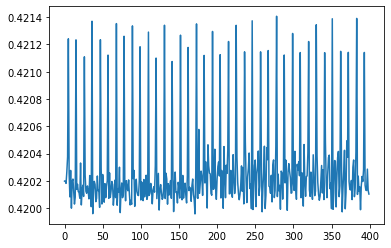

In [6]:
plt.plot(trace_array_y[0])

In [7]:
trace_array_y = np.array(trace_array_y)
print(len(pt_array))
print(len(key_array))
print(len(trace_array_y))
print(len(trace_array_y[0]))

500
500
500
400


# SBox

In [8]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0, 256)]

# Total Traces CPA Attack -- Method 2

In [9]:
def intermediate(pt, keyguess):
    return sbox[np.uint64(pt) ^ np.uint64(keyguess)]

def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

HW = [bin(n).count("1") for n in range(0, 256)]

In [10]:
t_bar = mean(np.array(trace_array_y))
o_t = std_dev(np.array(trace_array_y), t_bar)

key_guess = []
full_cpa_list = []
known_key = key_array[0]

for bnum in trange(0, 16):
    max_cpa = [0] * 256
    byte_cpa_list = [0] * 256
    for kguess in trange(0, 256):
        hws = np.array([[HW[intermediate(textin[bnum],kguess)] for textin in pt_array]]).transpose()
        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        correlation = cov(np.array(trace_array_y), t_bar, hws, hws_bar)
        cpaoutput = correlation/(o_t*o_hws)
        byte_cpa_list[kguess] = cpaoutput
        max_cpa[kguess] = np.max(abs(cpaoutput))
        
    full_cpa_list.append(byte_cpa_list[:])
    #np.array(full_cpa_list[bnum]).tofile("cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(max_cpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, max_cpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely F0 (actual F0)
 Top 5 guesses: 
   F0 - Diff = 0.943725
   85 - Diff = 0.264624
   05 - Diff = 0.248940
   74 - Diff = 0.246818
   CF - Diff = 0.241270




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely DE (actual DE)
 Top 5 guesses: 
   DE - Diff = 0.889697
   E2 - Diff = 0.265808
   6A - Diff = 0.256275
   F5 - Diff = 0.255728
   AB - Diff = 0.244284




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely BC (actual BC)
 Top 5 guesses: 
   BC - Diff = 0.747620
   80 - Diff = 0.271804
   DC - Diff = 0.256376
   0C - Diff = 0.242546
   F1 - Diff = 0.234472




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 9A (actual 9A)
 Top 5 guesses: 
   9A - Diff = 0.768603
   0E - Diff = 0.274886
   13 - Diff = 0.266596
   D2 - Diff = 0.260913
   50 - Diff = 0.257956




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 78 (actual 78)
 Top 5 guesses: 
   78 - Diff = 0.618336
   65 - Diff = 0.244569
   27 - Diff = 0.233847
   AC - Diff = 0.232633
   FC - Diff = 0.221529




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 56 (actual 56)
 Top 5 guesses: 
   56 - Diff = 0.792040
   A2 - Diff = 0.264449
   22 - Diff = 0.250382
   4B - Diff = 0.245548
   F0 - Diff = 0.244514




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 34 (actual 34)
 Top 5 guesses: 
   34 - Diff = 0.691547
   E2 - Diff = 0.270153
   5F - Diff = 0.249009
   A0 - Diff = 0.236188
   AD - Diff = 0.235600




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 12 (actual 12)
 Top 5 guesses: 
   12 - Diff = 0.836794
   86 - Diff = 0.272828
   24 - Diff = 0.245674
   F6 - Diff = 0.242550
   60 - Diff = 0.230970




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely EF (actual EF)
 Top 5 guesses: 
   EF - Diff = 0.550358
   C9 - Diff = 0.245383
   6F - Diff = 0.236423
   1F - Diff = 0.232118
   0F - Diff = 0.223990




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely CD (actual CD)
 Top 5 guesses: 
   CD - Diff = 0.819735
   7D - Diff = 0.269973
   D0 - Diff = 0.259744
   39 - Diff = 0.240702
   36 - Diff = 0.226277




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely AB (actual AB)
 Top 5 guesses: 
   AB - Diff = 0.894753
   13 - Diff = 0.278931
   5E - Diff = 0.255000
   4F - Diff = 0.251820
   1B - Diff = 0.248015




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely 89 (actual 89)
 Top 5 guesses: 
   89 - Diff = 0.955037
   04 - Diff = 0.291596
   DF - Diff = 0.281318
   9F - Diff = 0.255510
   C4 - Diff = 0.247188




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely 67 (actual 67)
 Top 5 guesses: 
   67 - Diff = 0.875380
   B2 - Diff = 0.270787
   58 - Diff = 0.260676
   2C - Diff = 0.232462
   59 - Diff = 0.230115




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely 45 (actual 45)
 Top 5 guesses: 
   45 - Diff = 0.724015
   1C - Diff = 0.287325
   F5 - Diff = 0.285749
   0D - Diff = 0.275495
   FE - Diff = 0.274727




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely 23 (actual 23)
 Top 5 guesses: 
   23 - Diff = 0.754408
   16 - Diff = 0.268544
   6B - Diff = 0.259750
   BC - Diff = 0.253711
   0D - Diff = 0.244419




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely 01 (actual 01)
 Top 5 guesses: 
   01 - Diff = 0.744034
   1C - Diff = 0.290952
   F1 - Diff = 0.266126
   83 - Diff = 0.252010
   5B - Diff = 0.246139




# How Many Traces Needed for Method 2

In [11]:
traces_enc_full = trace_array_y

In [12]:
len(traces_enc_full[0])

400

In [13]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [14]:
full_cpa_list = []
key_full_guess = []
how_many_correct_keybytes = []
is_same = 0

traces_enc = []
text_arrays = []

known_key = key_array[0]

for traces in trange(2,60,2):
    x = np.arange(2, 60, 2)
    traces_enc = np.array(traces_enc_full[0:traces])
    text_arrays = np.array(pt_array[0:traces])
    
    t_bar = mean(traces_enc)
    o_t = std_dev(traces_enc, t_bar)
    
    key_guess = []
    cpa_list = []
    for bnum in trange(0, 16):
        
        max_cpa = [0] * 256
        byte_cpa_list = [0] * 256
        
        for kguess in range(0, 256):
            hws = np.array([[HW[intermediate(textin[bnum],kguess)] for textin in text_arrays]]).transpose()
            hws_bar = mean(hws)
            o_hws = std_dev(hws, hws_bar)
            correlation = cov(traces_enc, t_bar, hws, hws_bar)
            cpaoutput = correlation/(o_t*o_hws)
            byte_cpa_list[kguess] = cpaoutput
            max_cpa[kguess] = np.max(abs(cpaoutput))
            
        cpa_list.append(byte_cpa_list)
        sorted_args = np.argsort(max_cpa)[::-1]
        key_guess.append(sorted_args[0])

    full_cpa_list.append(cpa_list)
    key_full_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

For  2 traces, correct key byte are  0




<ipython-input-14-1ef9179cc957>:31: RuntimeWarning: invalid value encountered in true_divide
  cpaoutput = correlation/(o_t*o_hws)


  0%|          | 0/16 [00:00<?, ?it/s]

For  4 traces, correct key byte are  0




  0%|          | 0/16 [00:00<?, ?it/s]

For  6 traces, correct key byte are  0




  0%|          | 0/16 [00:00<?, ?it/s]

For  8 traces, correct key byte are  0




  0%|          | 0/16 [00:00<?, ?it/s]

For 10 traces, correct key byte are  1




  0%|          | 0/16 [00:00<?, ?it/s]

For 12 traces, correct key byte are  2




  0%|          | 0/16 [00:00<?, ?it/s]

For 14 traces, correct key byte are  3




  0%|          | 0/16 [00:00<?, ?it/s]

For 16 traces, correct key byte are  4




  0%|          | 0/16 [00:00<?, ?it/s]

For 18 traces, correct key byte are  6




  0%|          | 0/16 [00:00<?, ?it/s]

For 20 traces, correct key byte are  7




  0%|          | 0/16 [00:00<?, ?it/s]

For 22 traces, correct key byte are  8




  0%|          | 0/16 [00:00<?, ?it/s]

For 24 traces, correct key byte are 11




  0%|          | 0/16 [00:00<?, ?it/s]

For 26 traces, correct key byte are 10




  0%|          | 0/16 [00:00<?, ?it/s]

For 28 traces, correct key byte are 11




  0%|          | 0/16 [00:00<?, ?it/s]

For 30 traces, correct key byte are 13




  0%|          | 0/16 [00:00<?, ?it/s]

For 32 traces, correct key byte are 12




  0%|          | 0/16 [00:00<?, ?it/s]

For 34 traces, correct key byte are 13




  0%|          | 0/16 [00:00<?, ?it/s]

For 36 traces, correct key byte are 14




  0%|          | 0/16 [00:00<?, ?it/s]

For 38 traces, correct key byte are 16




  0%|          | 0/16 [00:00<?, ?it/s]

For 40 traces, correct key byte are 15




  0%|          | 0/16 [00:00<?, ?it/s]

For 42 traces, correct key byte are 15




  0%|          | 0/16 [00:00<?, ?it/s]

For 44 traces, correct key byte are 15




  0%|          | 0/16 [00:00<?, ?it/s]

For 46 traces, correct key byte are 15




  0%|          | 0/16 [00:00<?, ?it/s]

For 48 traces, correct key byte are 15




  0%|          | 0/16 [00:00<?, ?it/s]

For 50 traces, correct key byte are 15




  0%|          | 0/16 [00:00<?, ?it/s]

For 52 traces, correct key byte are 16




  0%|          | 0/16 [00:00<?, ?it/s]

For 54 traces, correct key byte are 16




  0%|          | 0/16 [00:00<?, ?it/s]

For 56 traces, correct key byte are 16




  0%|          | 0/16 [00:00<?, ?it/s]

For 58 traces, correct key byte are 16




# CPA Number of traces vs. correctly guessed key bytes

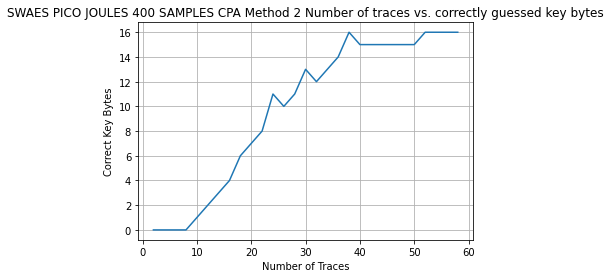

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# need to make adjustment here for further experienments
# here x is 45 because we run 45 intervals of traces from 5 to 230 with incresing step of 5
### edit below
#x = np.arange(2,45,2) 
### edit above

plt.plot(x, how_many_correct_keybytes)
plt.grid()
plt.xlabel('Number of Traces')
plt.ylabel('Correct Key Bytes')
############################################## edit here
plt.title('SWAES PICO JOULES 400 SAMPLES CPA Method 2 Number of traces vs. correctly guessed key bytes')
plt.savefig('joules_swaes_400samples_bytesVStraces_attack_cpa_method_2.jpg',dpi=300) # save jpg/png

# Plot for the correlation vs traces 

In [16]:
### take the max correct 16 subkeys out of the 45 experienments 
### so it is a 45x16x1 matrix for the correct key guess 1/256
### 45x16x255 matrix for the rest of the guesses keybyte

correct_full_list = []  #45x16x1
else_full_list = []  #45x16x255

for i in range (len(how_many_correct_keybytes)):
    correct_16_subbyte_list = []  #16x1
    else_16_subbyte_list = []  #16x255
    
    for subkey in range (16):
        max_correct = []  #1
        max_else = []  #255
        
        for guess in range(0, 256):  #take the max correlation of the correct key guess 
            if (guess == known_key[subkey]):
                ### edit below -- the list name need to be change for the especific name 
                corr = full_cpa_list[i][subkey][guess] 
                ### edit above -- the list name need to be change for the especific name 
                ymax = corr.max()
                max_correct.append(ymax)
            else:
                corr = full_cpa_list[i][subkey][guess]
                ymax = corr.max()
                max_else.append(ymax)
                
        correct_16_subbyte_list.append(max_correct)
        
        else_16_subbyte_list.append(max_else)
        
    correct_full_list.append(correct_16_subbyte_list)
    
    else_full_list.append(else_16_subbyte_list)

print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))
print(len(else_full_list))
print(len(else_full_list[0]))
print(len(else_full_list[0][0]))

29
16
1
29
16
255


In [17]:
### make the correct key correlation to 16x45x1 matrix

corr_plot_full = []
for i in range (16):
    corr_plot = []
    for j in range (len(how_many_correct_keybytes)):
        corr_plot.append(correct_full_list[j][i])  ## invert the i and j 
    corr_plot_full.append(corr_plot)

In [18]:
### make the else key correlation to 16x255x45 matrix

else_16 = []
for i in range (16):
    else_255 = []
    for j in range (len(else_full_list[0][0])):
        else_list = []
        for k in range (len(how_many_correct_keybytes)):
            else_list.append(else_full_list[k][i][j])  ## invert the i, j and k 
        else_255.append(else_list)
    else_16.append(else_255)

<Figure size 432x288 with 0 Axes>

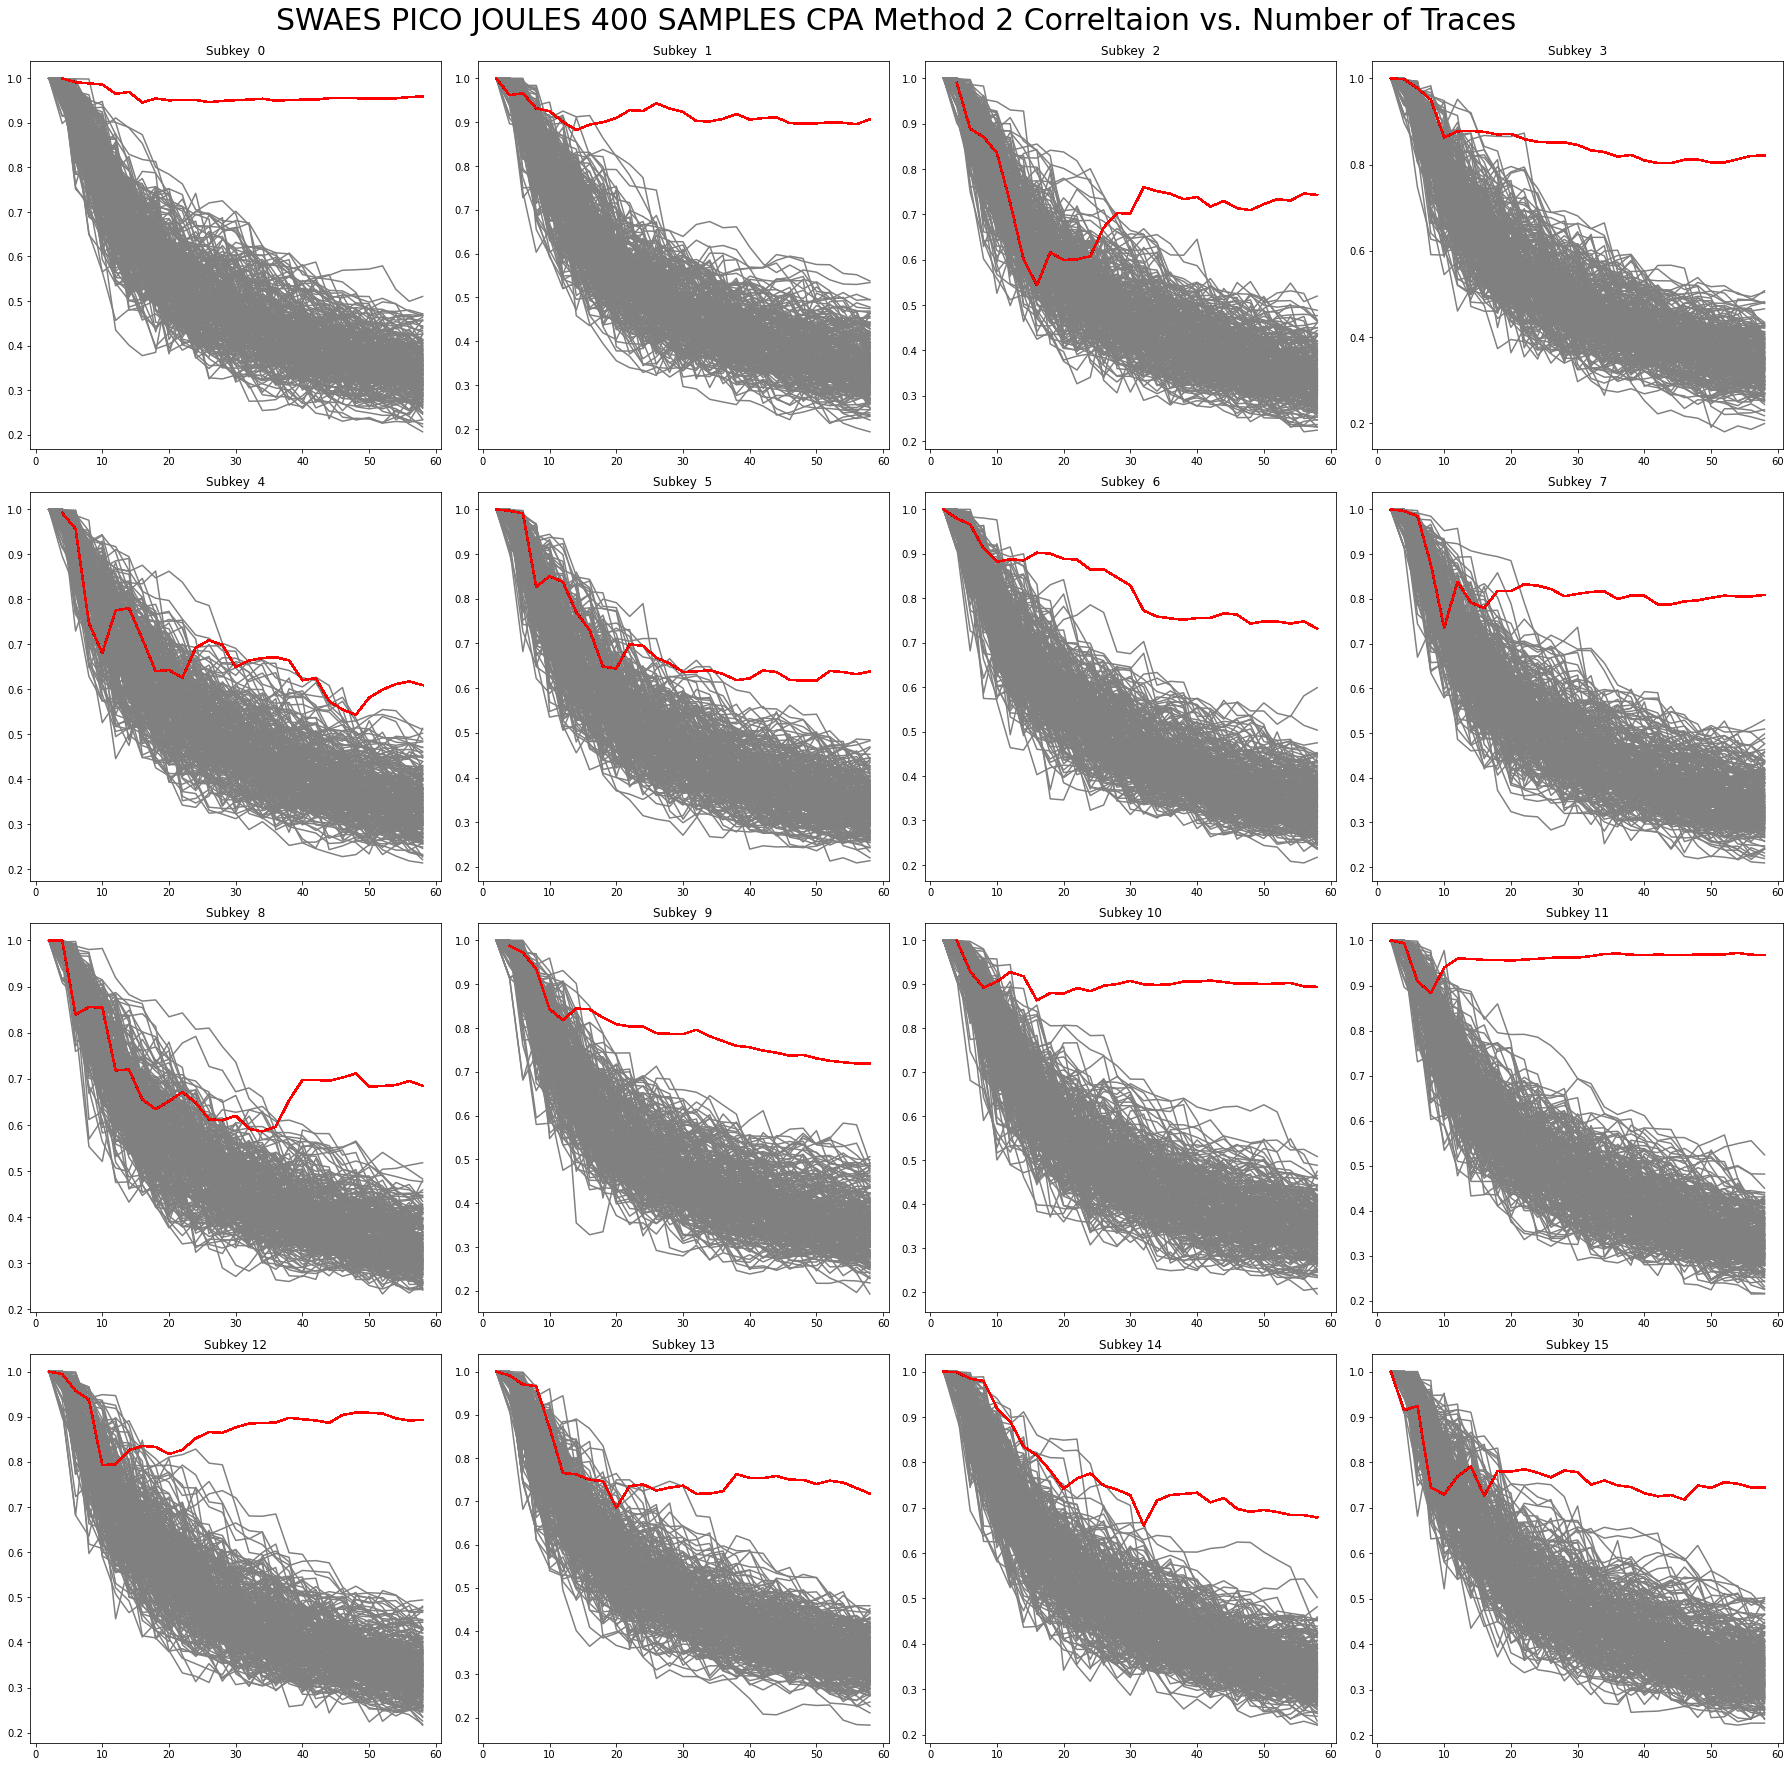

In [22]:
### plot a 16 subplot, 16 subkeys
### each subkeys has 255 guesses 
### each guesses has 45 points in this experienment

import pylab

import warnings  #ignore the subplot warmings of pylab.subplot(4,4,subkey+1)
warnings.filterwarnings('ignore')

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))  #making a 4x4 subplot, figsize 25x25

for subkey in range (16):
    for guess in range (len(else_16[0])):
        pylab.subplot(4,4,subkey+1)  # marking the position of each subplot
        ### edit below, different experienment needs different xaxis
        #x = np.arange(5, 230, 5)  
        ### edit above
        y = else_16[subkey][guess]  #plotting the 255 guesses
        plt.plot(x,y,color='grey')  #set wrong guesses as grey
        y1 = corr_plot_full[subkey]  #plotting the correct 1 guesses
        plt.plot(x,y1,color='red',linewidth=1.5, linestyle='-',zorder=255)  #set correct guesses as red
        plt.title('Subkey %2d' %(subkey))
        
plt.tight_layout()
plt.subplots_adjust(top=0.95)

#################################edit the title and figure name###########################3
plt.suptitle('SWAES PICO JOULES 400 SAMPLES CPA Method 2 Correltaion vs. Number of Traces', size=30)

plt.savefig('joules_swaes_400samples_attack_cpa_method_2.jpg',dpi=300)  
            
plt.show()

# Plots

<Figure size 432x288 with 0 Axes>

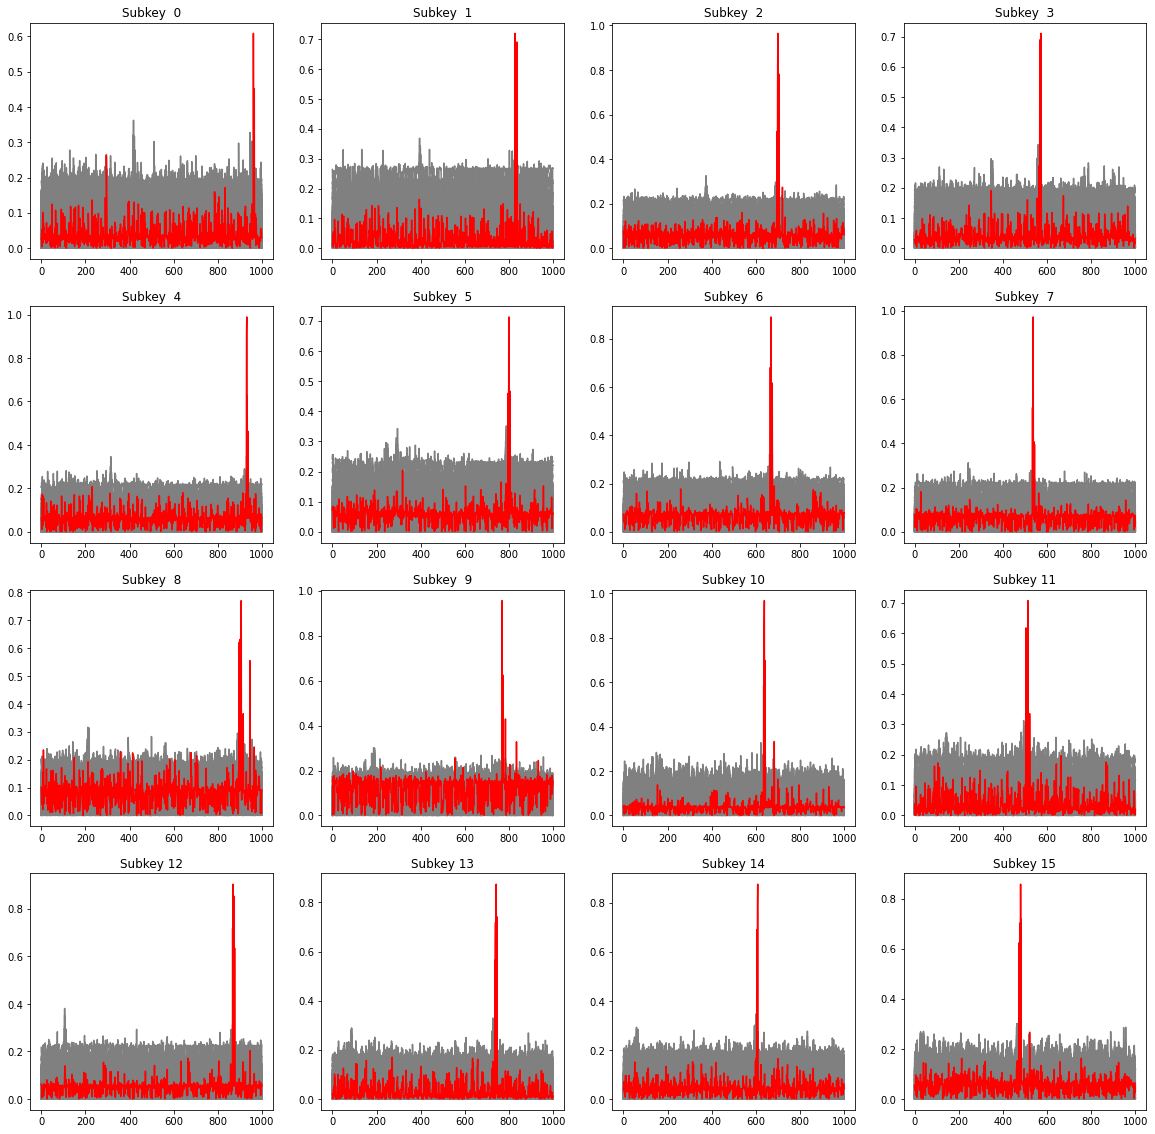

In [16]:
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(20,20))
value = 1
sub = 0
for i in range (16):
    pylab.subplot(4,4,value)
    subkey = sub
    for guess in range(0, 256):
        if (guess == key_array[0][subkey]):
            plt.plot(abs(full_cpa_list[subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[subkey][guess]),color="grey")
    value += 1
    sub += 1
    plt.title('Subkey %2d' %(sub-1))
plt.show()

<Figure size 432x288 with 0 Axes>

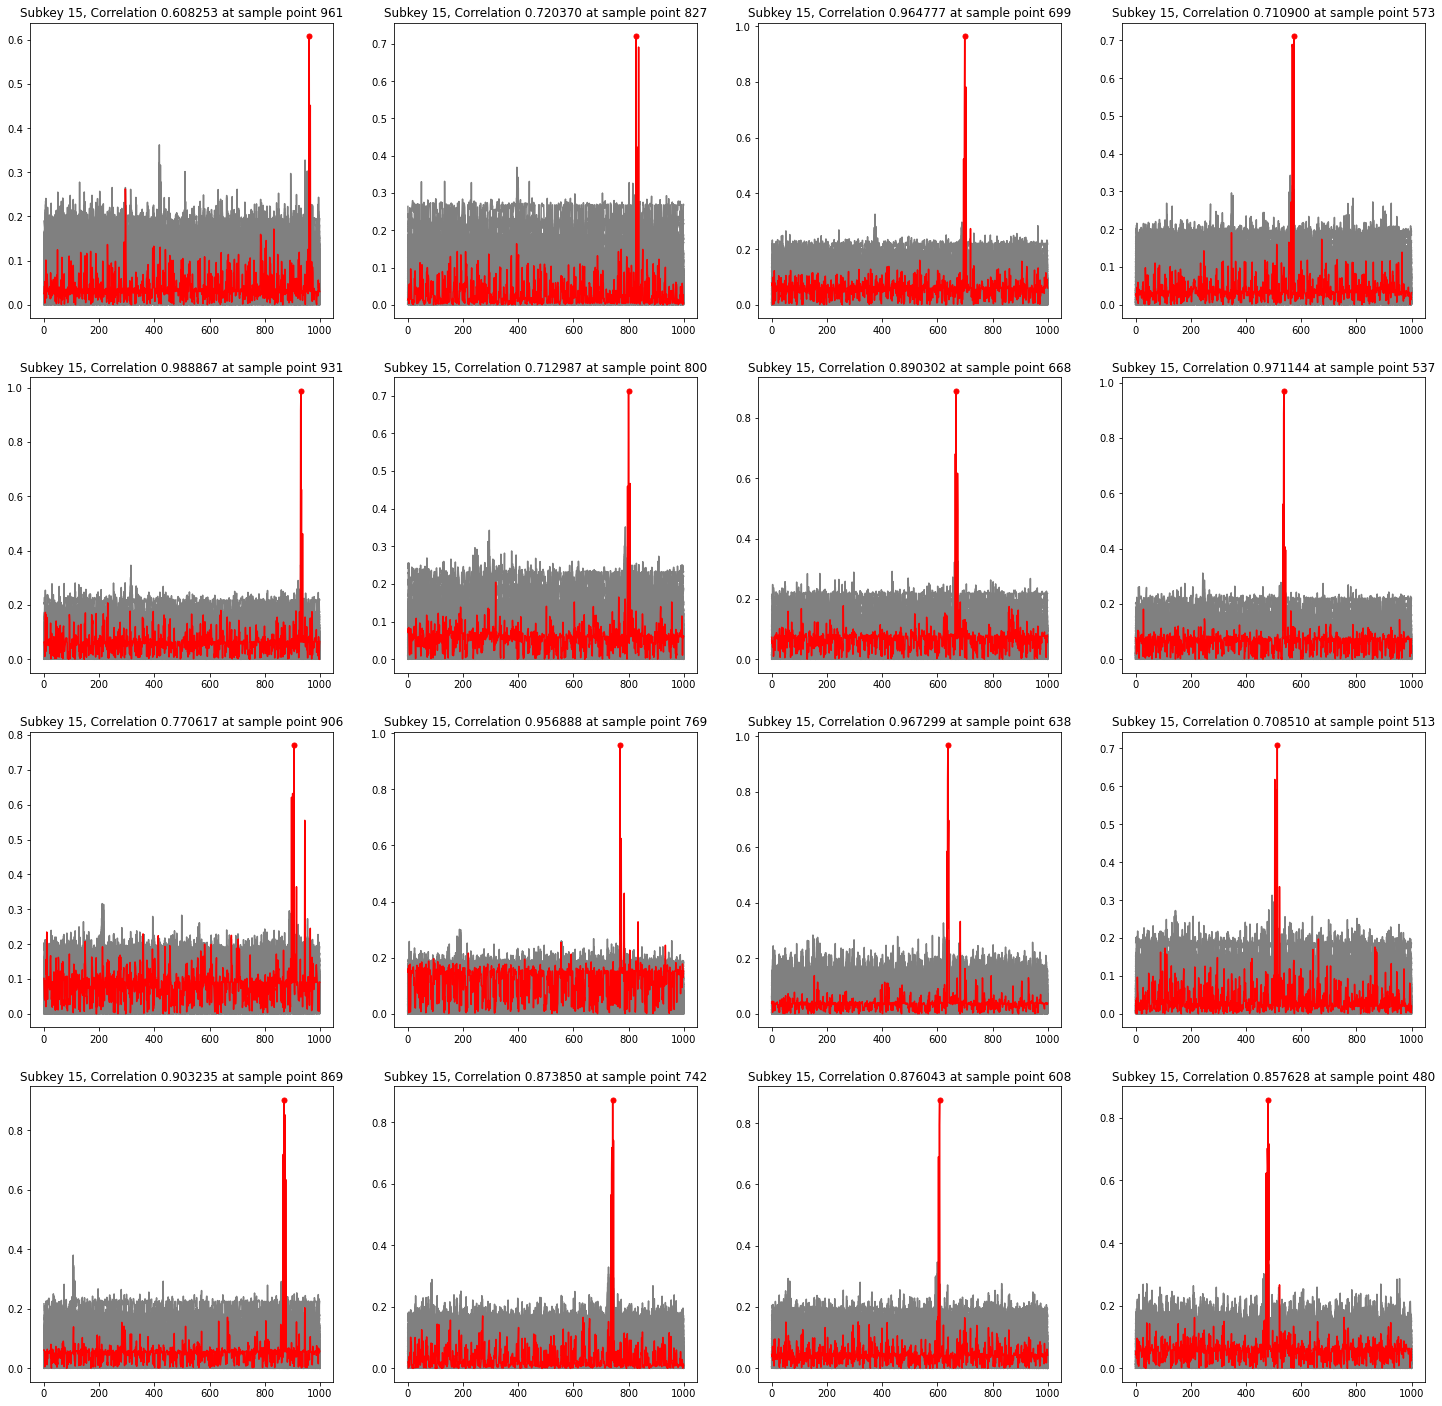

In [17]:
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(25,25))
value = 1
for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[subkey][guess]),color="grey")
    value += 1
    corr = abs(full_cpa_list[subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = corr.max()
    plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(sub-1,ymax,xmax))
plt.show()

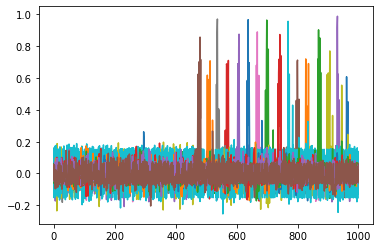

In [18]:
plt.figure()
for subkey in range(0, 16):
    plt.plot(full_cpa_list[subkey][known_key[subkey]])
plt.show()

# this only has the correct key plot, do not delete it, learning purposes here

<Figure size 432x288 with 0 Axes>

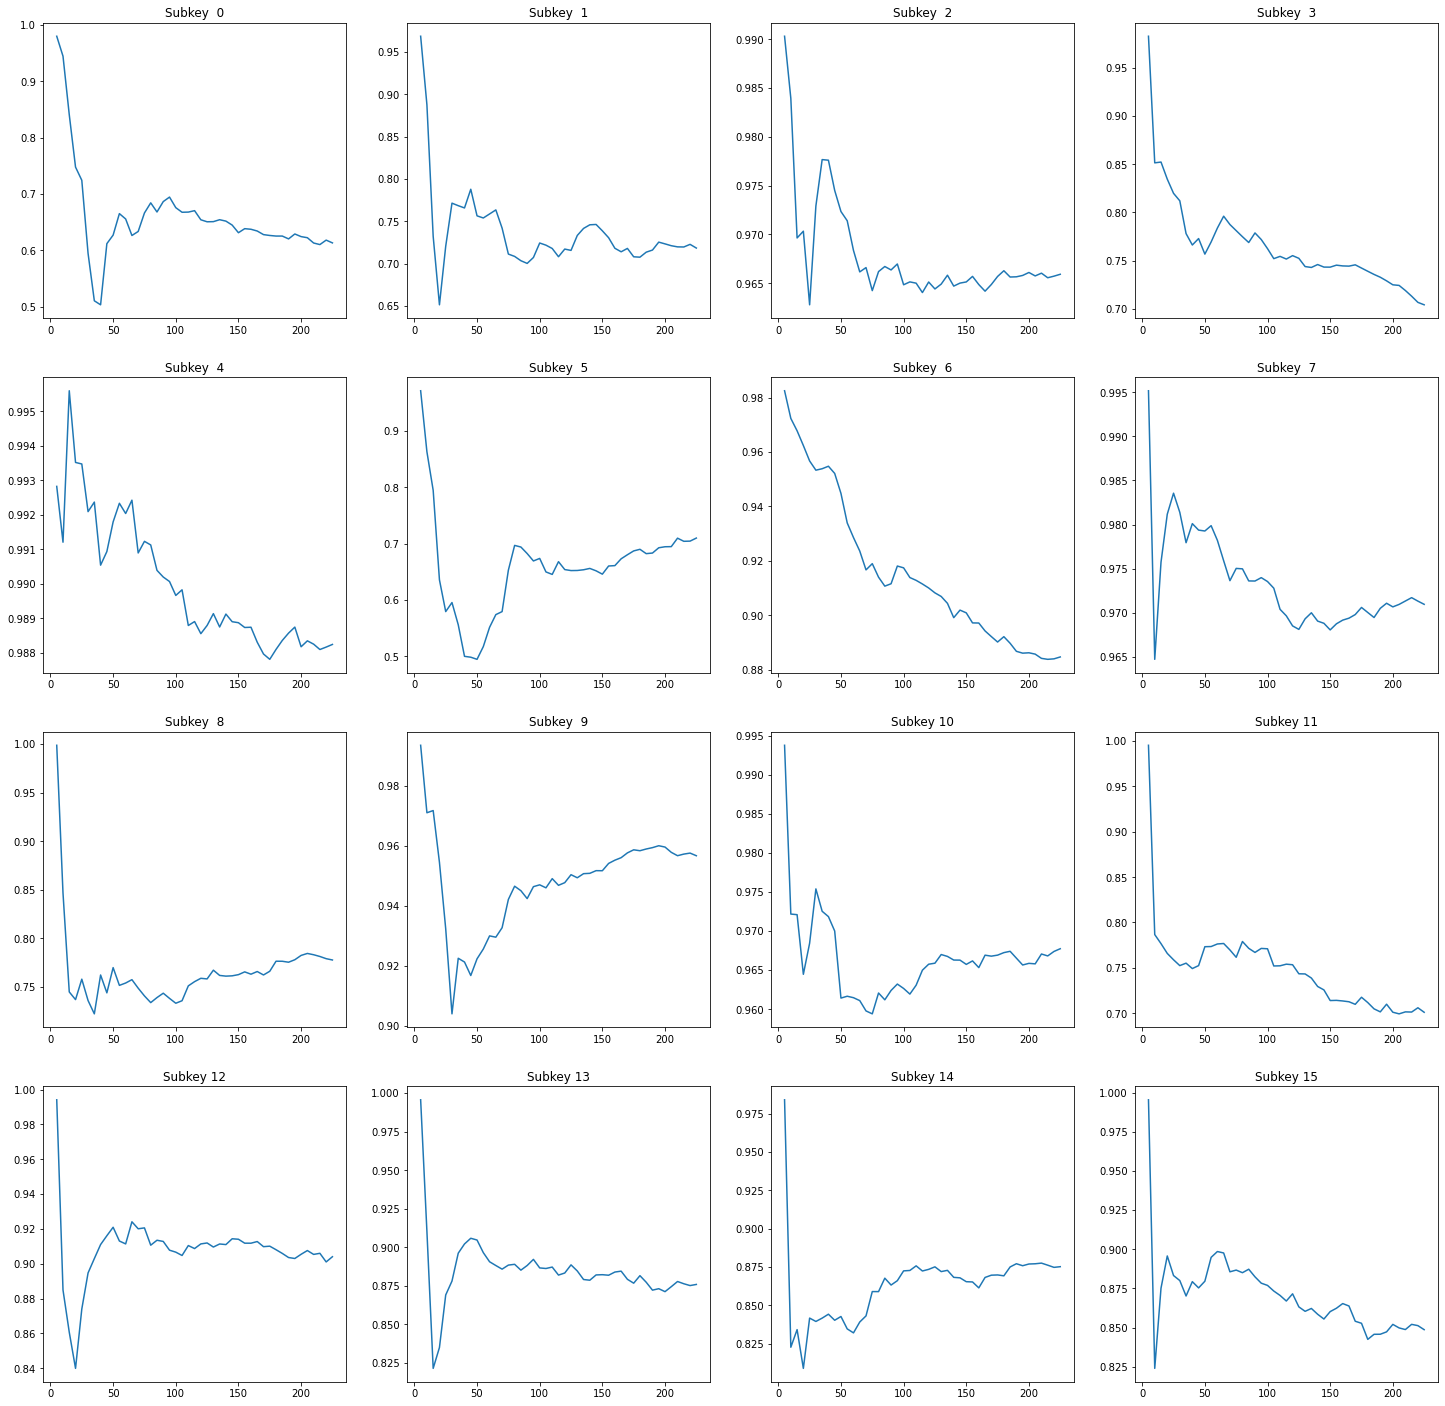

In [193]:
import pylab

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))

for subkey in range (16):
    pylab.subplot(4,4,subkey+1)
    x = np.arange(5, 230, 5)
    y = corr_plot_full[subkey]
    plt.plot(x,y)
    plt.title('Subkey %2d' %(subkey))
            
plt.show()

# by changing  full_cpa_list[0][subkey][guess] from 0 to 16 we can see 16 total correlation vs samples plot, this contains the peak point marked as '.' 

<Figure size 432x288 with 0 Axes>

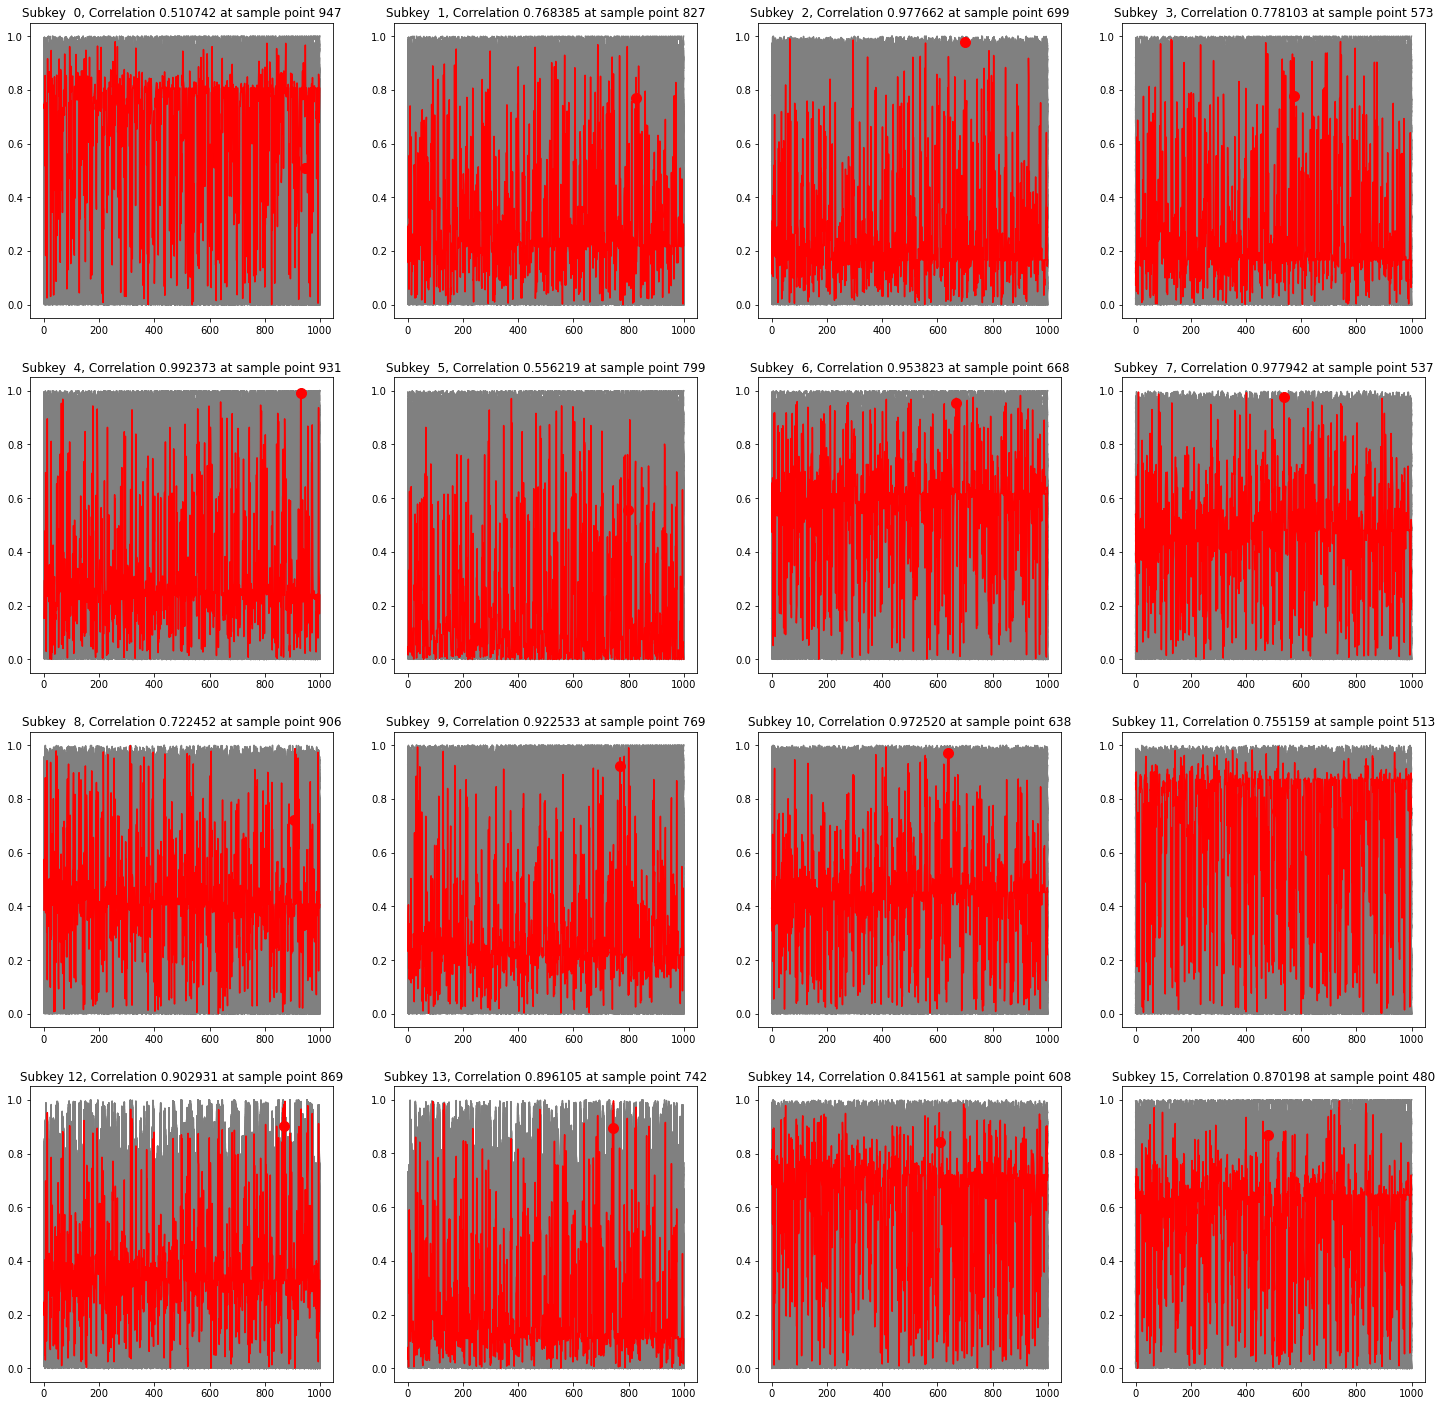

In [36]:
import pylab

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))

value = 1

for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[0][subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[0][subkey][guess]),color="grey")
            
    value += 1
    
    corr = abs(full_cpa_list[6][subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = corr.max()
    plt.plot([xmax],[ymax],marker='.', markersize=20, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))
    
plt.show()